In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

In [2]:
trails=40
sample_rate=100
baseline=0.5
sec_for_each_trials=1.5
signal_time=(sec_for_each_trials+baseline)*sample_rate
signal=[]
for j in range(trails):
    signal.append(np.random.uniform(0, (sec_for_each_trials+baseline),int(signal_time)))


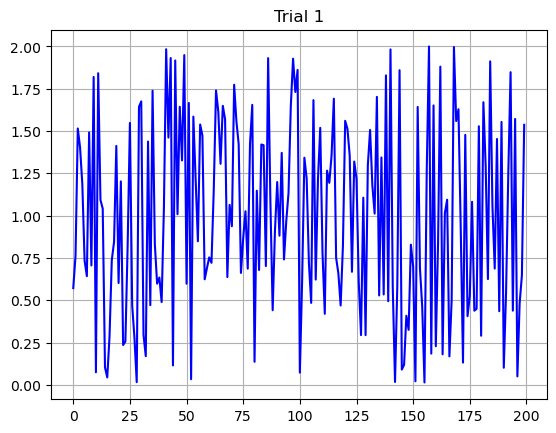

In [3]:
plt.plot(signal[0],color = 'blue')
plt.title('Trial 1')
plt.grid(True, which='both')
plt.show()

In [4]:
#each trial has 200 sample
len(signal[0])

200

# Get Fourier Transform to each window for each trial

In [5]:
def discrete_fourier_transform(complex_signal):

    F = np.zeros(complex_signal.shape,dtype=np.complex64)
    n = complex_signal.shape[0]
    for u in np.arange(n):
        for x in np.arange(n):
            F[u] += complex_signal[x]* np.exp((-1j *2* np.pi*u*x)/n)
        
    return F

In [6]:
window=int((len(signal[0])*10)/100)
overlap=int((len(signal[0])*5)/100)
print("window: ",window)
print("overlap: ",overlap)

TF=[]
windows_time=[]
for trial in range(len(signal)):
    fourier=[]
    time=[]
    for i in range(0,len(signal[trial]),overlap):
        signal_time=signal[trial][i:(i+window)]
        time.append(i+(len(signal_time)/2))
        dft=discrete_fourier_transform(signal_time)
        fourier.append(dft)
        
    windows_time.append(time)
    TF.append(fourier)  

window:  20
overlap:  10


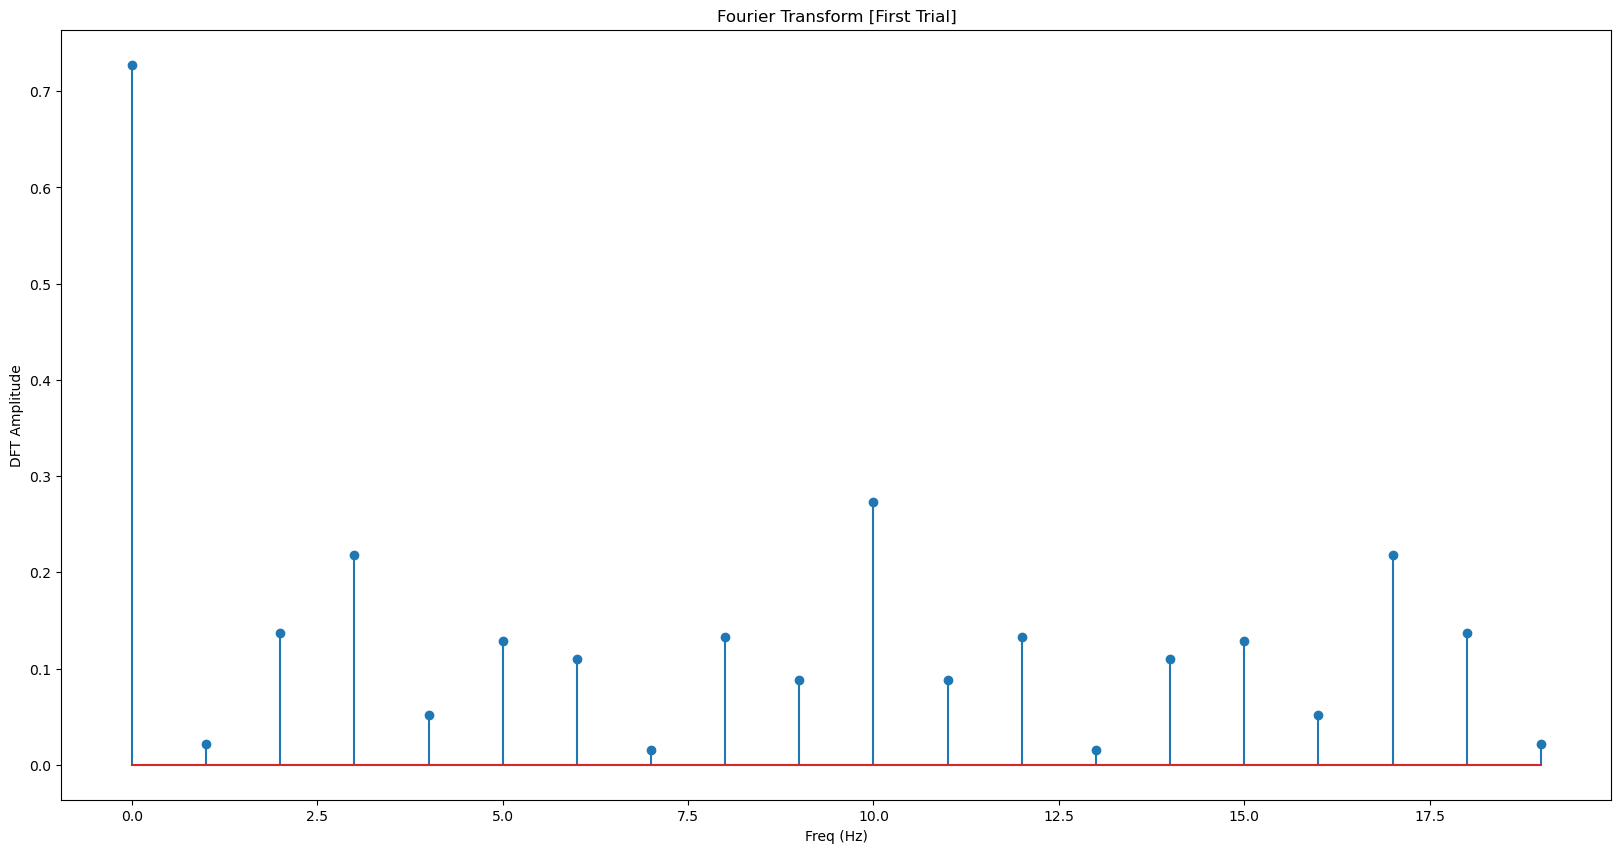

In [7]:
coeff=TF[0][1]
# calculate the frequency
N = len(coeff)
freq = np.arange(N)
amplitude=np.abs(coeff/N)
plt.figure(figsize = (20,10))
plt.stem(freq, amplitude)
plt.title('Fourier Transform [First Trial]')

plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude')
plt.show()

## Plot First Trial

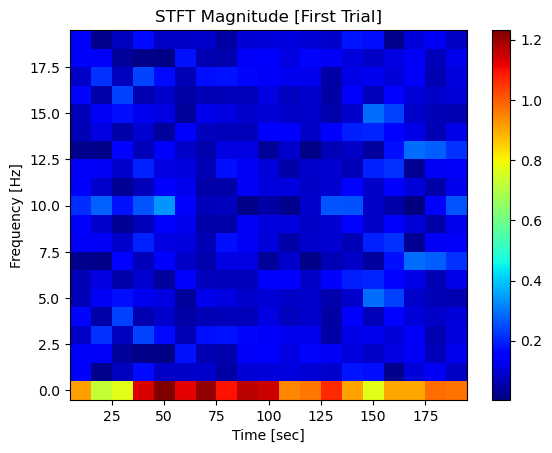

In [8]:
trial_coeff=TF[0][:19]
WT=windows_time[0][:19]

N=len(TF[0][0])
freq=np.arange(N)
amplitude=abs(np.array(trial_coeff)/N)
plt.pcolormesh(WT, freq,amplitude.T, cmap='jet',shading='nearest')
plt.colorbar()
plt.title('STFT Magnitude [First Trial]')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## Average all trials

In [9]:
trials=len(TF)
samples=len(TF[0])
STFT=[]
for i in range(samples):
    summation=0
    for j in range(trials):
        summation+=TF[j][i]
    STFT.append(summation/trials)

In [10]:
np.array(STFT[:19]).shape

(19, 20)

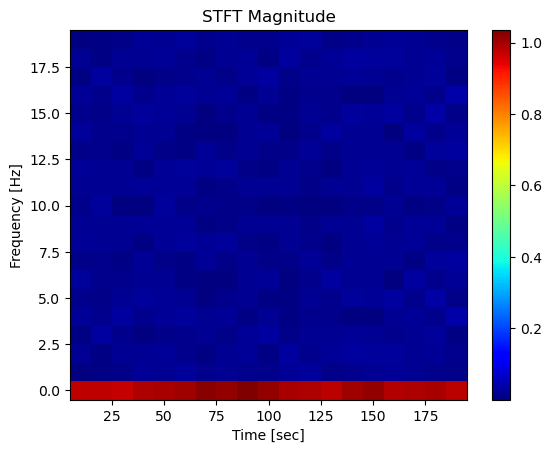

In [11]:
amplitude=abs(np.array(STFT[:19])/N)
WT=windows_time[0][:19]

plt.pcolormesh(WT, freq,amplitude.T, cmap='jet',shading='nearest')
plt.colorbar()
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Baseline Correction

In [12]:
# Get baseline mean
# 4 windows ===> (0,20)(10,30)(20,40)(30,50)
summ=0
baseline=STFT[:4]
for i in range(len(baseline)):
    summ+=baseline[i]
    
baseline_mean=summ/len(baseline)
baseline_mean

array([ 1.95965462e+01+0.0000000e+00j, -4.41055186e-03+9.7153604e-02j,
        4.52305377e-02-1.2107808e-01j,  1.15078442e-01+3.9373033e-02j,
        2.19547465e-01+1.9529398e-01j,  1.16306856e-01+4.3337010e-02j,
        7.74681270e-02-2.4917606e-01j, -1.50642637e-02-7.4814990e-02j,
       -5.30796349e-02+2.5043830e-01j,  2.63743028e-02+2.4726279e-02j,
       -1.81967497e-01+1.1272518e-14j,  2.63743028e-02-2.4726279e-02j,
       -5.30796349e-02-2.5043830e-01j, -1.50642637e-02+7.4814990e-02j,
        7.74681270e-02+2.4917606e-01j,  1.16306856e-01-4.3337010e-02j,
        2.19547465e-01-1.9529398e-01j,  1.15078442e-01-3.9373033e-02j,
        4.52305377e-02+1.2107808e-01j, -4.41055186e-03-9.7153604e-02j],
      dtype=complex64)

In [13]:
for i in range(len(STFT)-1):
    STFT[i]-=baseline_mean
        

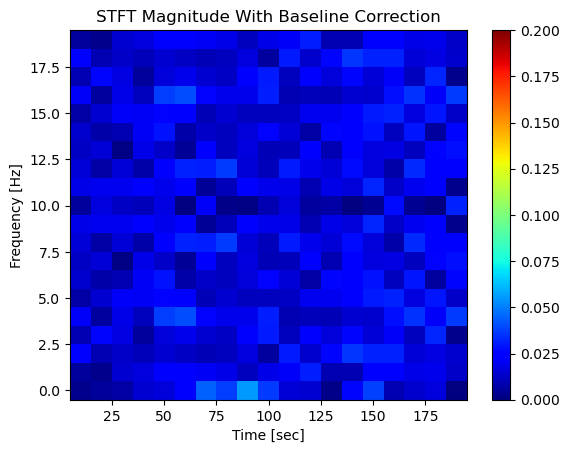

In [14]:
amplitude=abs(np.array(STFT[:19])/N)
WT=windows_time[0][:19]

plt.pcolormesh(WT, freq, amplitude.T, vmin=0,vmax=0.2,cmap='jet',shading='nearest')
plt.colorbar()
plt.title('STFT Magnitude With Baseline Correction')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [15]:
len(baseline_mean)

20

## percentage change between the signal and the baseline

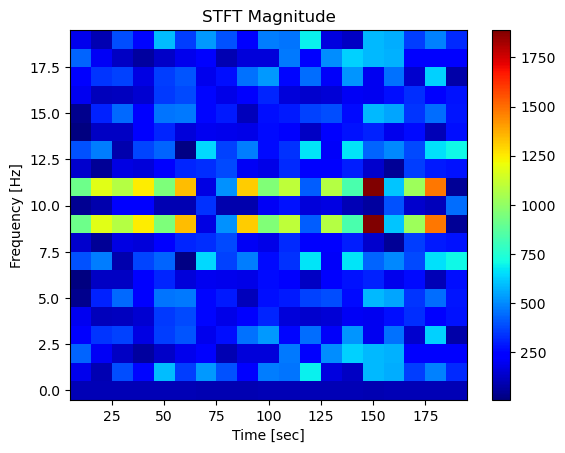

In [16]:
SIGNAL=STFT[:19]
percentage=(SIGNAL-baseline_mean)/baseline_mean

amplitude=abs(percentage*100)
WT=windows_time[0][:19]

plt.pcolormesh(WT, freq,amplitude.T, cmap='jet',shading='nearest')
plt.colorbar()
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# ITPC

In [17]:
trail_sample=TF[:3]
np.array(trail_sample[0][0:19]).shape

(19, 20)

### Apply Baseline Correction

In [18]:
#Get baseline mean for each trail
# 4 windows ===> (0,20)(10,30)(20,40)(30,50)
baseline_mean=[]
for i in range(len(TF)):
    summ=0
    baseline=TF[i][:4]
    for j in range(len(baseline)):
        summ+=baseline[j]
    baseline_mean.append(summ/len(baseline))
np.array(baseline_mean).shape

for i in range(len(trail_sample)):
    for j in range(len(trail_sample[0])-1):
        trail_sample[i][j]-=baseline_mean[i]

In [19]:
print(len(trail_sample))
np.array(trail_sample[0][:19]).shape

3


(19, 20)

In [20]:
phase=[]
ITPC_average=0
for i in range(len(trail_sample)):
    trial_phase=np.angle(trail_sample[i][0:19])
    ITPC_average+=trial_phase
    phase.append(trial_phase)
    
np.array(phase).shape

(3, 19, 20)

In [21]:
np.array(ITPC_average).shape

(19, 20)

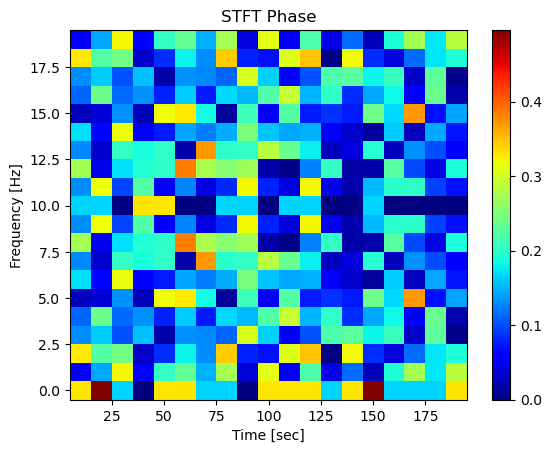

In [22]:
amplitude=abs(ITPC_average/19)
WT=windows_time[0][:19]

plt.pcolormesh(WT, freq,amplitude.T, cmap='jet',shading='nearest')
plt.colorbar()
plt.title('STFT Phase')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Baseline Correction

In [23]:
#Get baseline mean for each trail
# 4 windows ===> (0,20)(10,30)(20,40)(30,50)
baseline_mean=[]
for i in range(len(TF)):
    summ=0
    baseline=TF[i][:4]
    for j in range(len(baseline)):
        summ+=baseline[j]
    baseline_mean.append(summ/len(baseline))
np.array(baseline_mean).shape

(40, 20)

In [24]:
for i in range(len(TF)):
    for j in range(len(TF[0])-1):
        TF[i][j]-=baseline_mean[i]

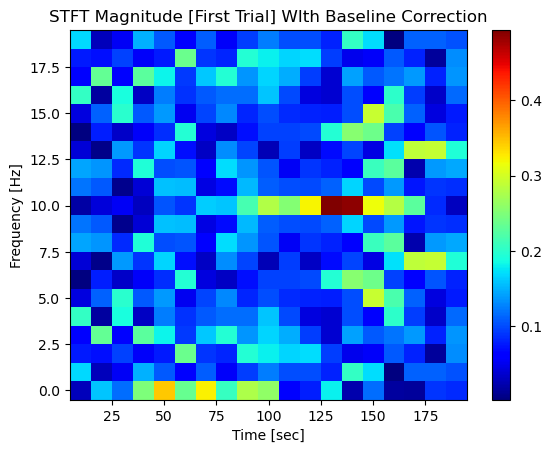

In [25]:
trial_coeff=TF[0][:19]
WT=windows_time[0][:19]

N=len(TF[0][0])
freq=np.arange(N)
amplitude=abs(np.array(trial_coeff)/N)
plt.pcolormesh(WT, freq,amplitude.T, cmap='jet',shading='nearest')
plt.colorbar()
plt.title('STFT Magnitude [First Trial] WIth Baseline Correction')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [26]:
trials=len(TF)
samples=len(TF[0])
stf=[]
for i in range(samples):
    summation=0
    for j in range(trials):
        summation+=TF[j][i]
    stf.append(summation/trials)

In [27]:
np.array(stf[:19]).shape

(19, 20)

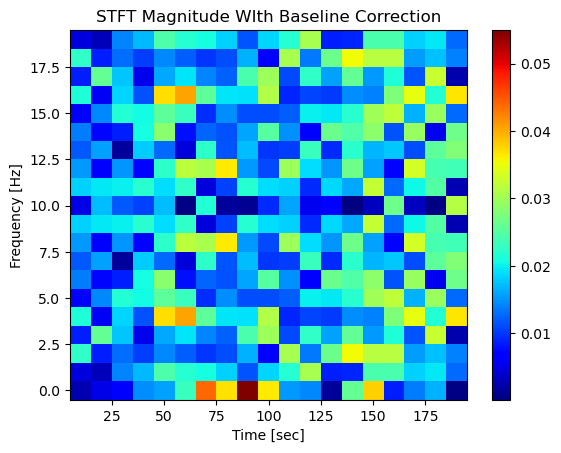

In [28]:
trial_coeff=stf[:19]
WT=windows_time[0][:19]

N=len(TF[0][0])
freq=np.arange(N)
amplitude=abs(np.array(trial_coeff)/N)
plt.pcolormesh(WT, freq,amplitude.T, cmap='jet',shading='nearest')
plt.colorbar()
plt.title('STFT Magnitude WIth Baseline Correction')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()